<a href="https://colab.research.google.com/github/RodrigoSchneiderbr/Machine_learning/blob/main/modulo_2_processamento_e_limpeza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn

In [3]:
dados = pd.read_csv("https://pycourse.s3.amazonaws.com/Data.csv")
dados.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [8]:
dados.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

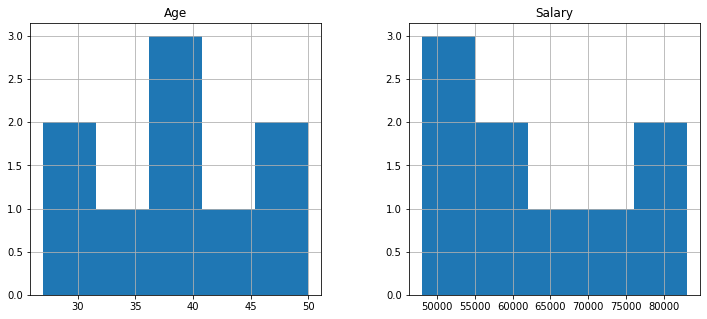

In [10]:
fig , ax = plt.subplots(ncols = 2, figsize=(12,5))
dados.hist(column="Age", ax=ax[0], bins = 5)
dados.hist(column= "Salary", ax=ax[1], bins = 5)
plt.show()

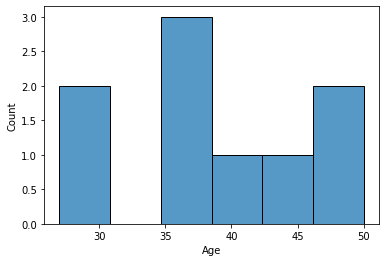

In [14]:
srn.histplot(dados["Age"], bins = 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


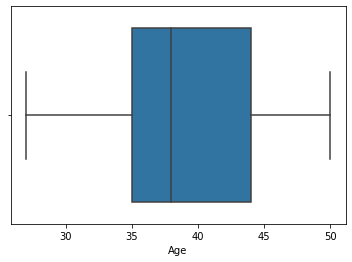

In [19]:
srn.boxplot(dados['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


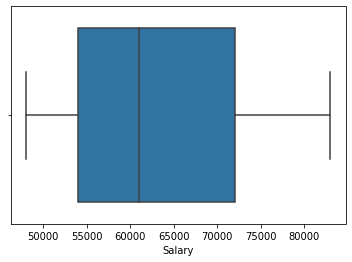

In [20]:
srn.boxplot(dados['Salary'])

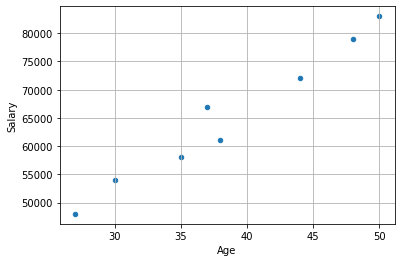

In [21]:
dados.plot.scatter(x = "Age", y = "Salary", grid = "on")

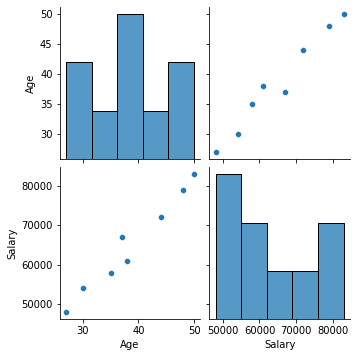

In [22]:
srn.pairplot(data = dados[["Age","Salary"]], diag_kind = "hist")

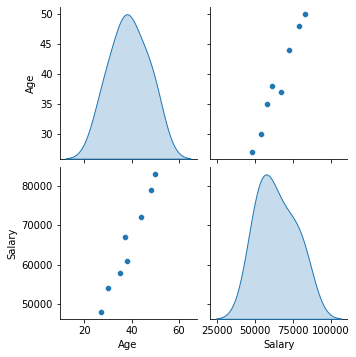

In [23]:
srn.pairplot(data = dados[["Age","Salary"]], diag_kind = "kde")

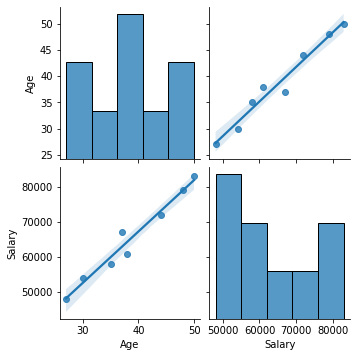

In [25]:
srn.pairplot(data = dados[["Age","Salary"]], kind = "reg")

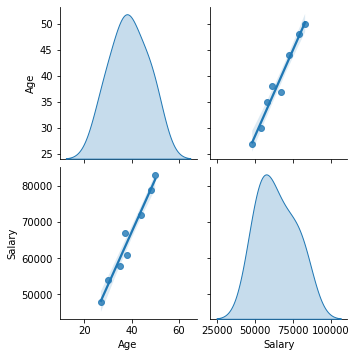

In [26]:
srn.pairplot(data = dados[["Age","Salary"]], kind = "reg", diag_kind = "kde")

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
np.set_printoptions(precision = 4, suppress = True)

In [29]:
imputer = SimpleImputer(strategy = 'mean')
num_cols_mean = imputer.fit_transform(dados[["Age","Salary"]])
num_cols_mean

array([[   44.    , 72000.    ],
       [   27.    , 48000.    ],
       [   30.    , 54000.    ],
       [   38.    , 61000.    ],
       [   40.    , 63777.7778],
       [   35.    , 58000.    ],
       [   38.7778, 52000.    ],
       [   48.    , 79000.    ],
       [   50.    , 83000.    ],
       [   37.    , 67000.    ]])

In [31]:
imputer_2 = SimpleImputer(strategy = 'median')
num_cols_median = imputer_2.fit_transform(dados[['Age',"Salary"]])
num_cols_median

array([[   44., 72000.],
       [   27., 48000.],
       [   30., 54000.],
       [   38., 61000.],
       [   40., 61000.],
       [   35., 58000.],
       [   38., 52000.],
       [   48., 79000.],
       [   50., 83000.],
       [   37., 67000.]])

In [32]:
dados[['Age','Salary']] = num_cols_median

In [33]:
dados.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [35]:
sc = StandardScaler()
num_cols_std = sc.fit_transform(dados[['Age',"Salary"]])

In [36]:
num_cols_std

array([[ 0.7697,  0.7726],
       [-1.6992, -1.4088],
       [-1.2635, -0.8635],
       [-0.1017, -0.2272],
       [ 0.1888, -0.2272],
       [-0.5374, -0.4999],
       [-0.1017, -1.0452],
       [ 1.3507,  1.4088],
       [ 1.6411,  1.7724],
       [-0.2469,  0.3181]])

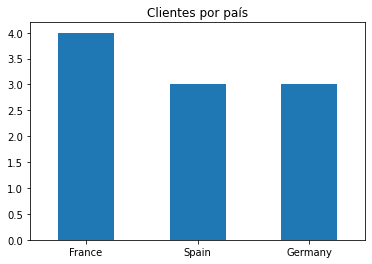

In [39]:
dados['Country'].value_counts().plot.bar(rot = 0, title = "Clientes por país")

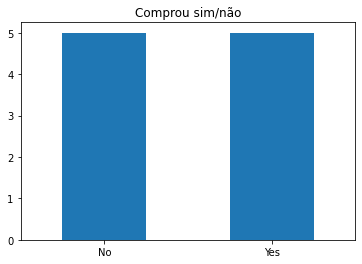

In [40]:
dados['Purchased'].value_counts().plot.bar(rot = 0, title = "Comprou sim/não")

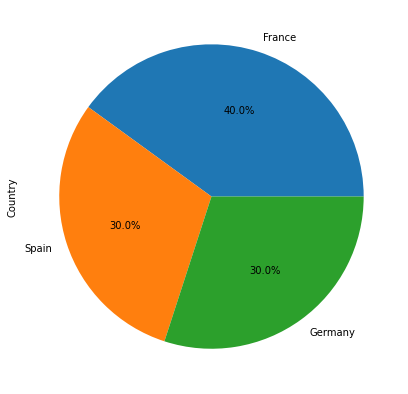

In [41]:
dados['Country'].value_counts().plot.pie(autopct = '%.1f%%', figsize= (7,7))

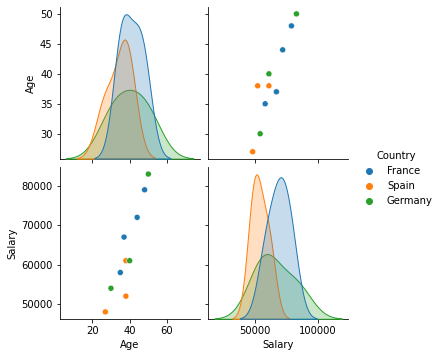

In [42]:
srn.pairplot(data = dados, hue ='Country')

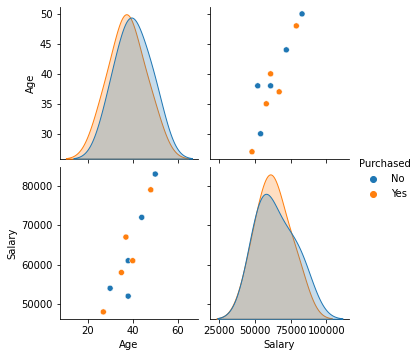

In [44]:
srn.pairplot(data = dados, hue = "Purchased")

In [45]:
dados.iloc[1,0] = np.nan

In [47]:
dados

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,NaN,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [48]:
imputer = SimpleImputer(strategy = "most_frequent")
dados['Country'] = imputer.fit_transform(dados[['Country']])


In [49]:
dados

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,France,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [53]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [51]:
oe = OrdinalEncoder()
oe.fit_transform(dados[['Country']])

array([[0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.]])

In [52]:
pd.get_dummies(data = dados, columns=["Country"])

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,No,1,0,0
1,27.0,48000.0,Yes,1,0,0
2,30.0,54000.0,No,0,1,0
3,38.0,61000.0,No,0,0,1
4,40.0,61000.0,Yes,0,1,0
5,35.0,58000.0,Yes,1,0,0
6,38.0,52000.0,No,0,0,1
7,48.0,79000.0,Yes,1,0,0
8,50.0,83000.0,No,0,1,0
9,37.0,67000.0,Yes,1,0,0


In [57]:
le = LabelEncoder()
dados["Purchased"] = le.fit_transform(dados['Purchased'])
dados

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,France,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,61000.0,1
5,France,35.0,58000.0,1
6,Spain,38.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


In [56]:
from sklearn.preprocessing import LabelEncoder